In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

<h1 style='background:#CCE2CB; border:0; color:black'><center> Loading Data </center></h1>

In [ ]:
df = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')

<h1 style='background:#CCE2CB; border:0; color:black'><center> EDA </center></h1>

In [ ]:
df.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
186790,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,30.0,1.0,0.0,0.0,4.0,5.0,6.0
70021,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,7.0
186105,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,4.0,0.0,0.0,11.0,4.0,4.0
99205,0.0,1.0,1.0,1.0,45.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
90544,0.0,0.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2.0,5.0,1.0,1.0,10.0,6.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
'MentHlth', 'PhysHlth', 'BMI'

('MentHlth', 'PhysHlth', 'BMI')

In [ ]:
catcol = ['', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']

ValueError: ignored

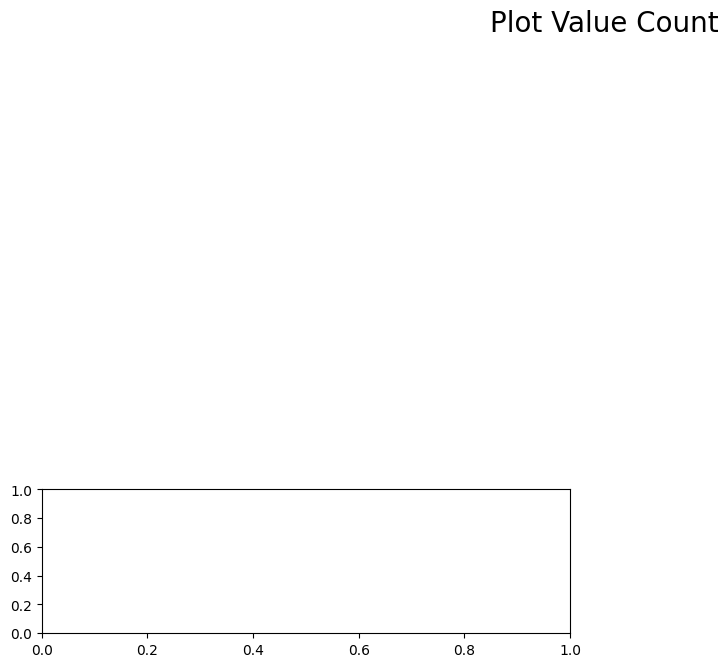

In [ ]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

<Axes: xlabel='BMI', ylabel='Count'>

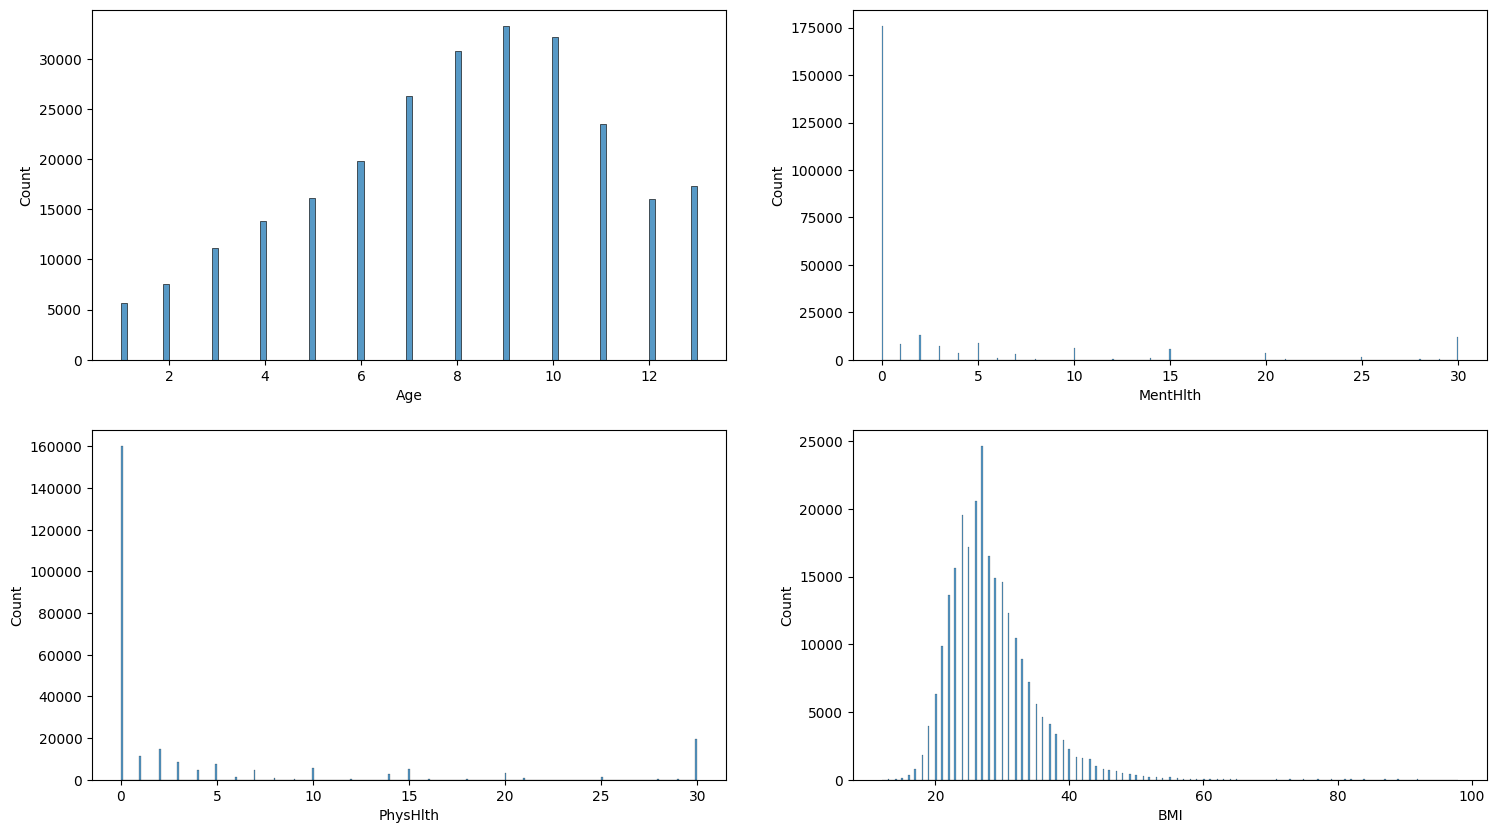

In [ ]:
distcol = ['Age', 'MentHlth', 'PhysHlth', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=df, x=distcol[0])
sns.histplot(ax=axes[0,1], data=df, x=distcol[1])
sns.histplot(ax=axes[1,0], data=df, x=distcol[2])
sns.histplot(ax=axes[1,1], data=df, x=distcol[3])

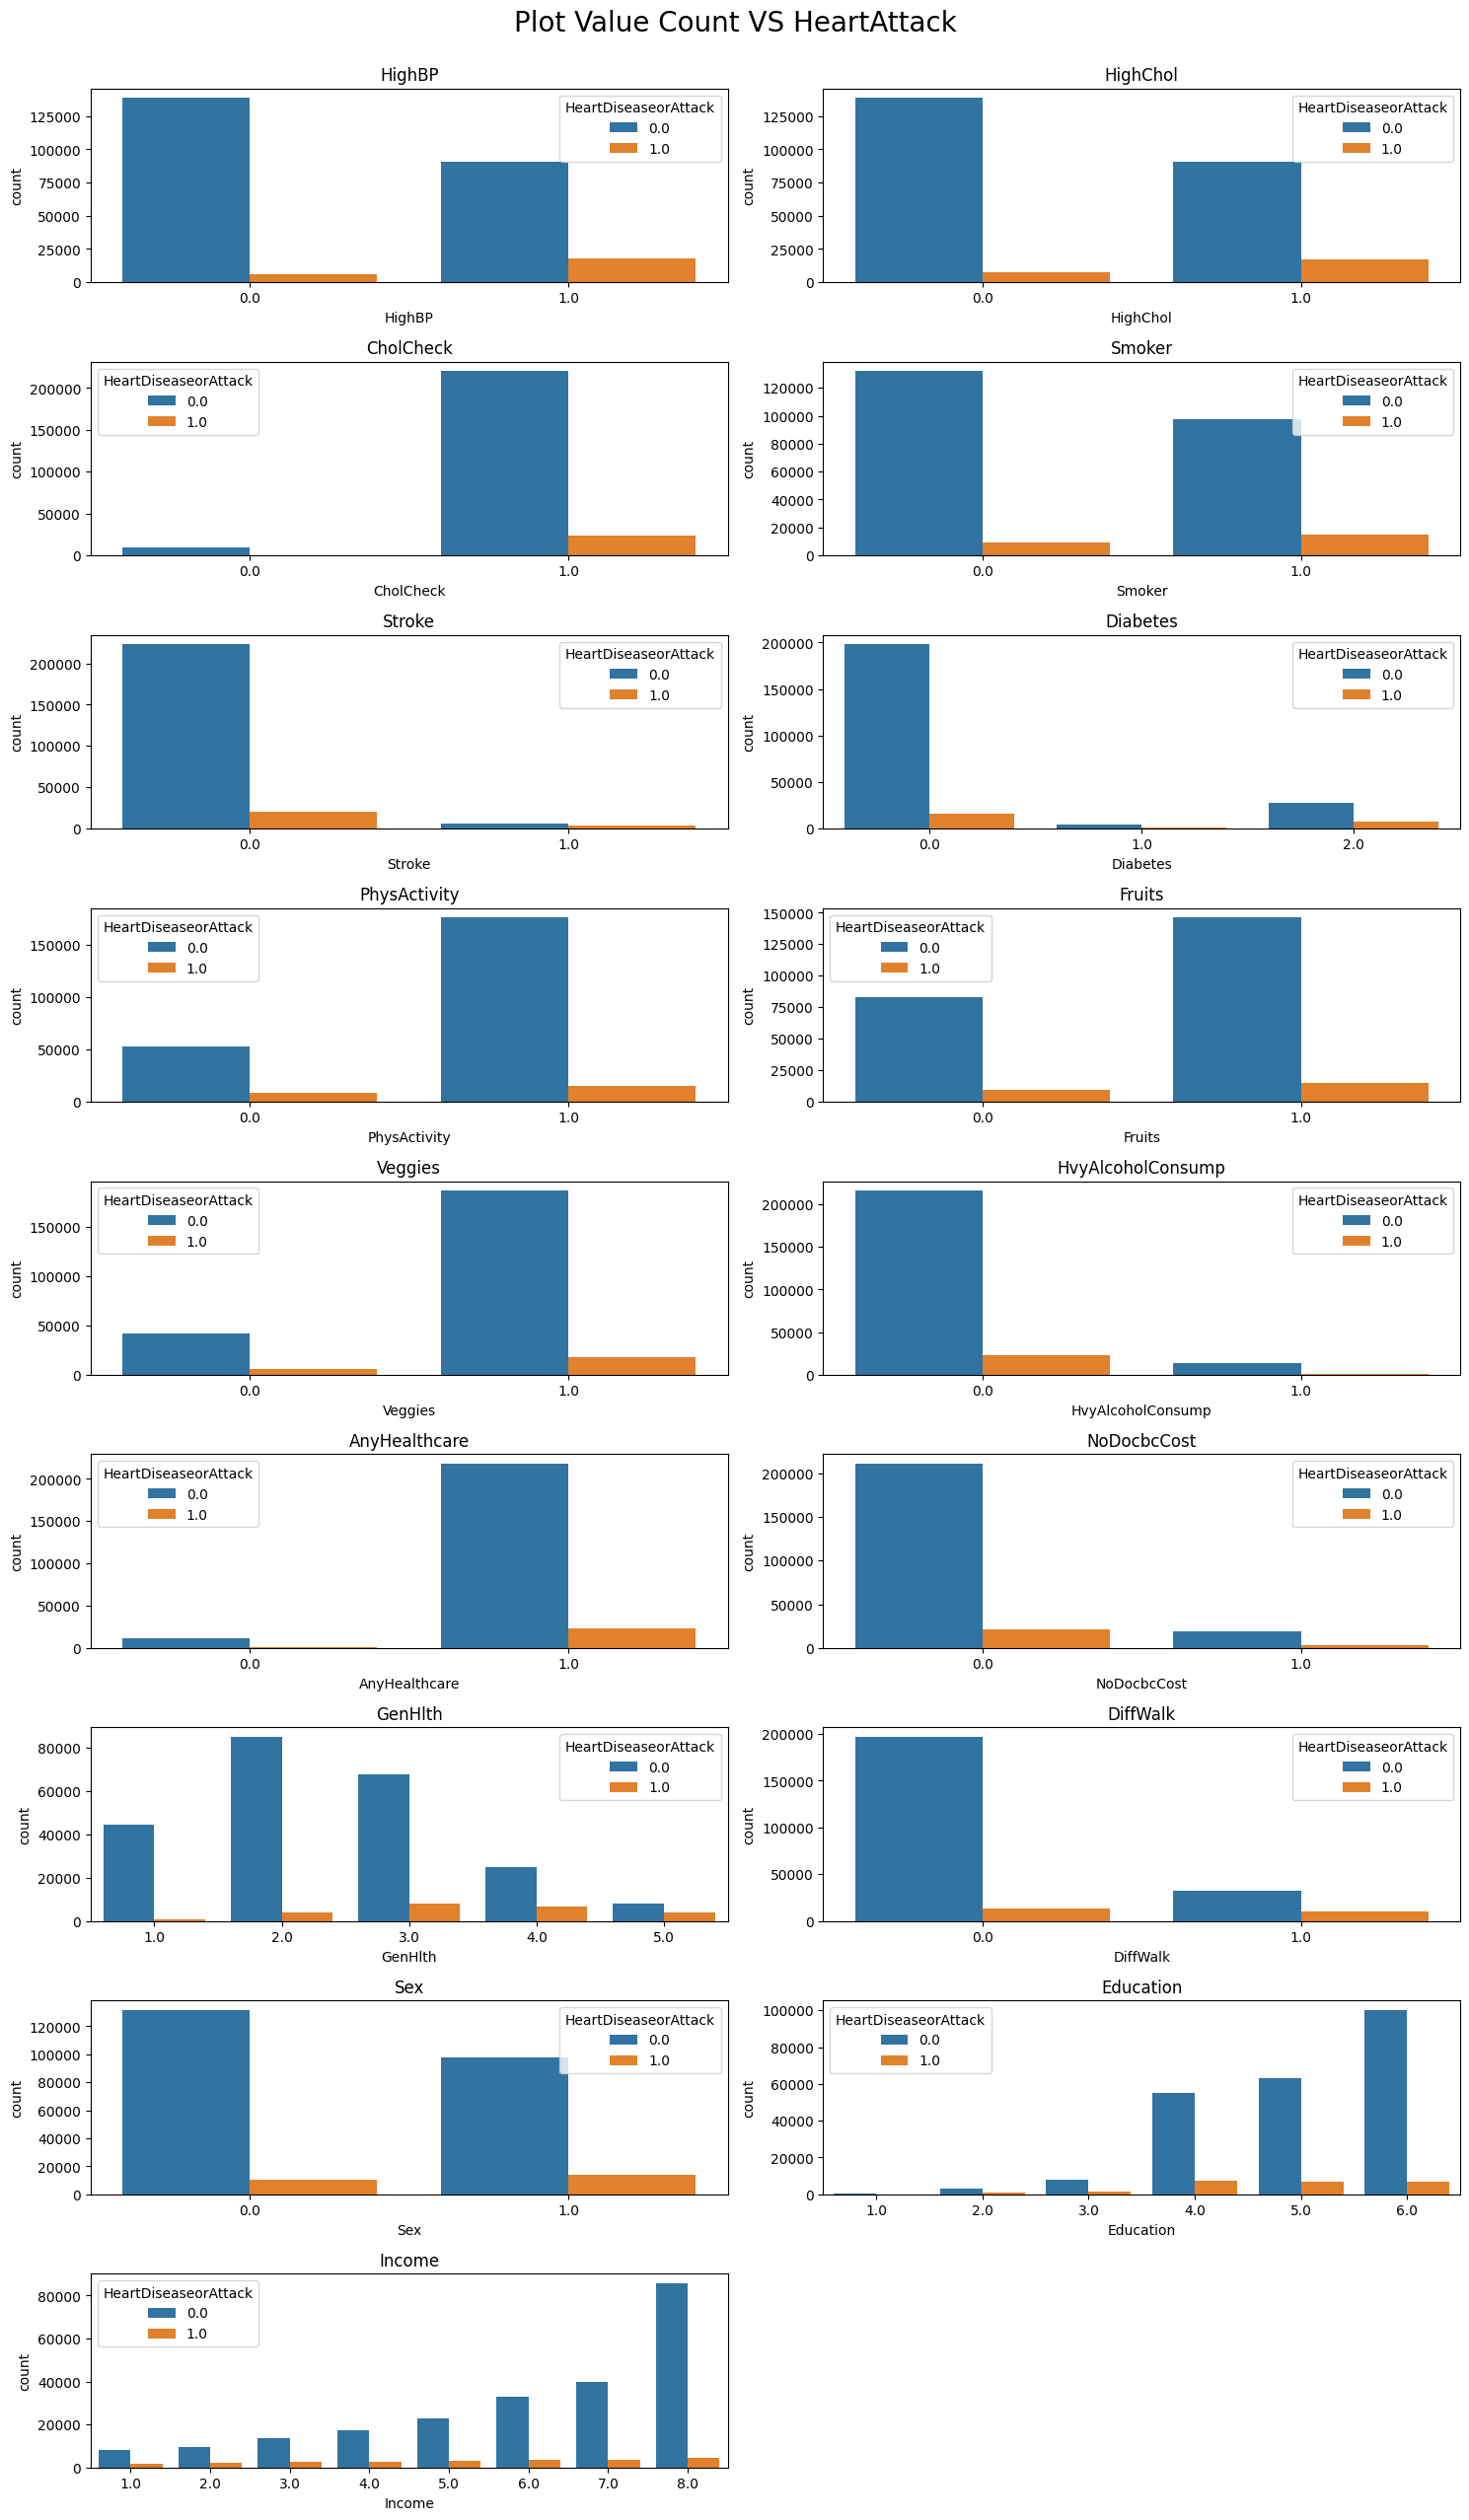

In [ ]:
plt.figure(figsize=(15,50))
for i,column in enumerate(catcol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseorAttack')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
bincol = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
         'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

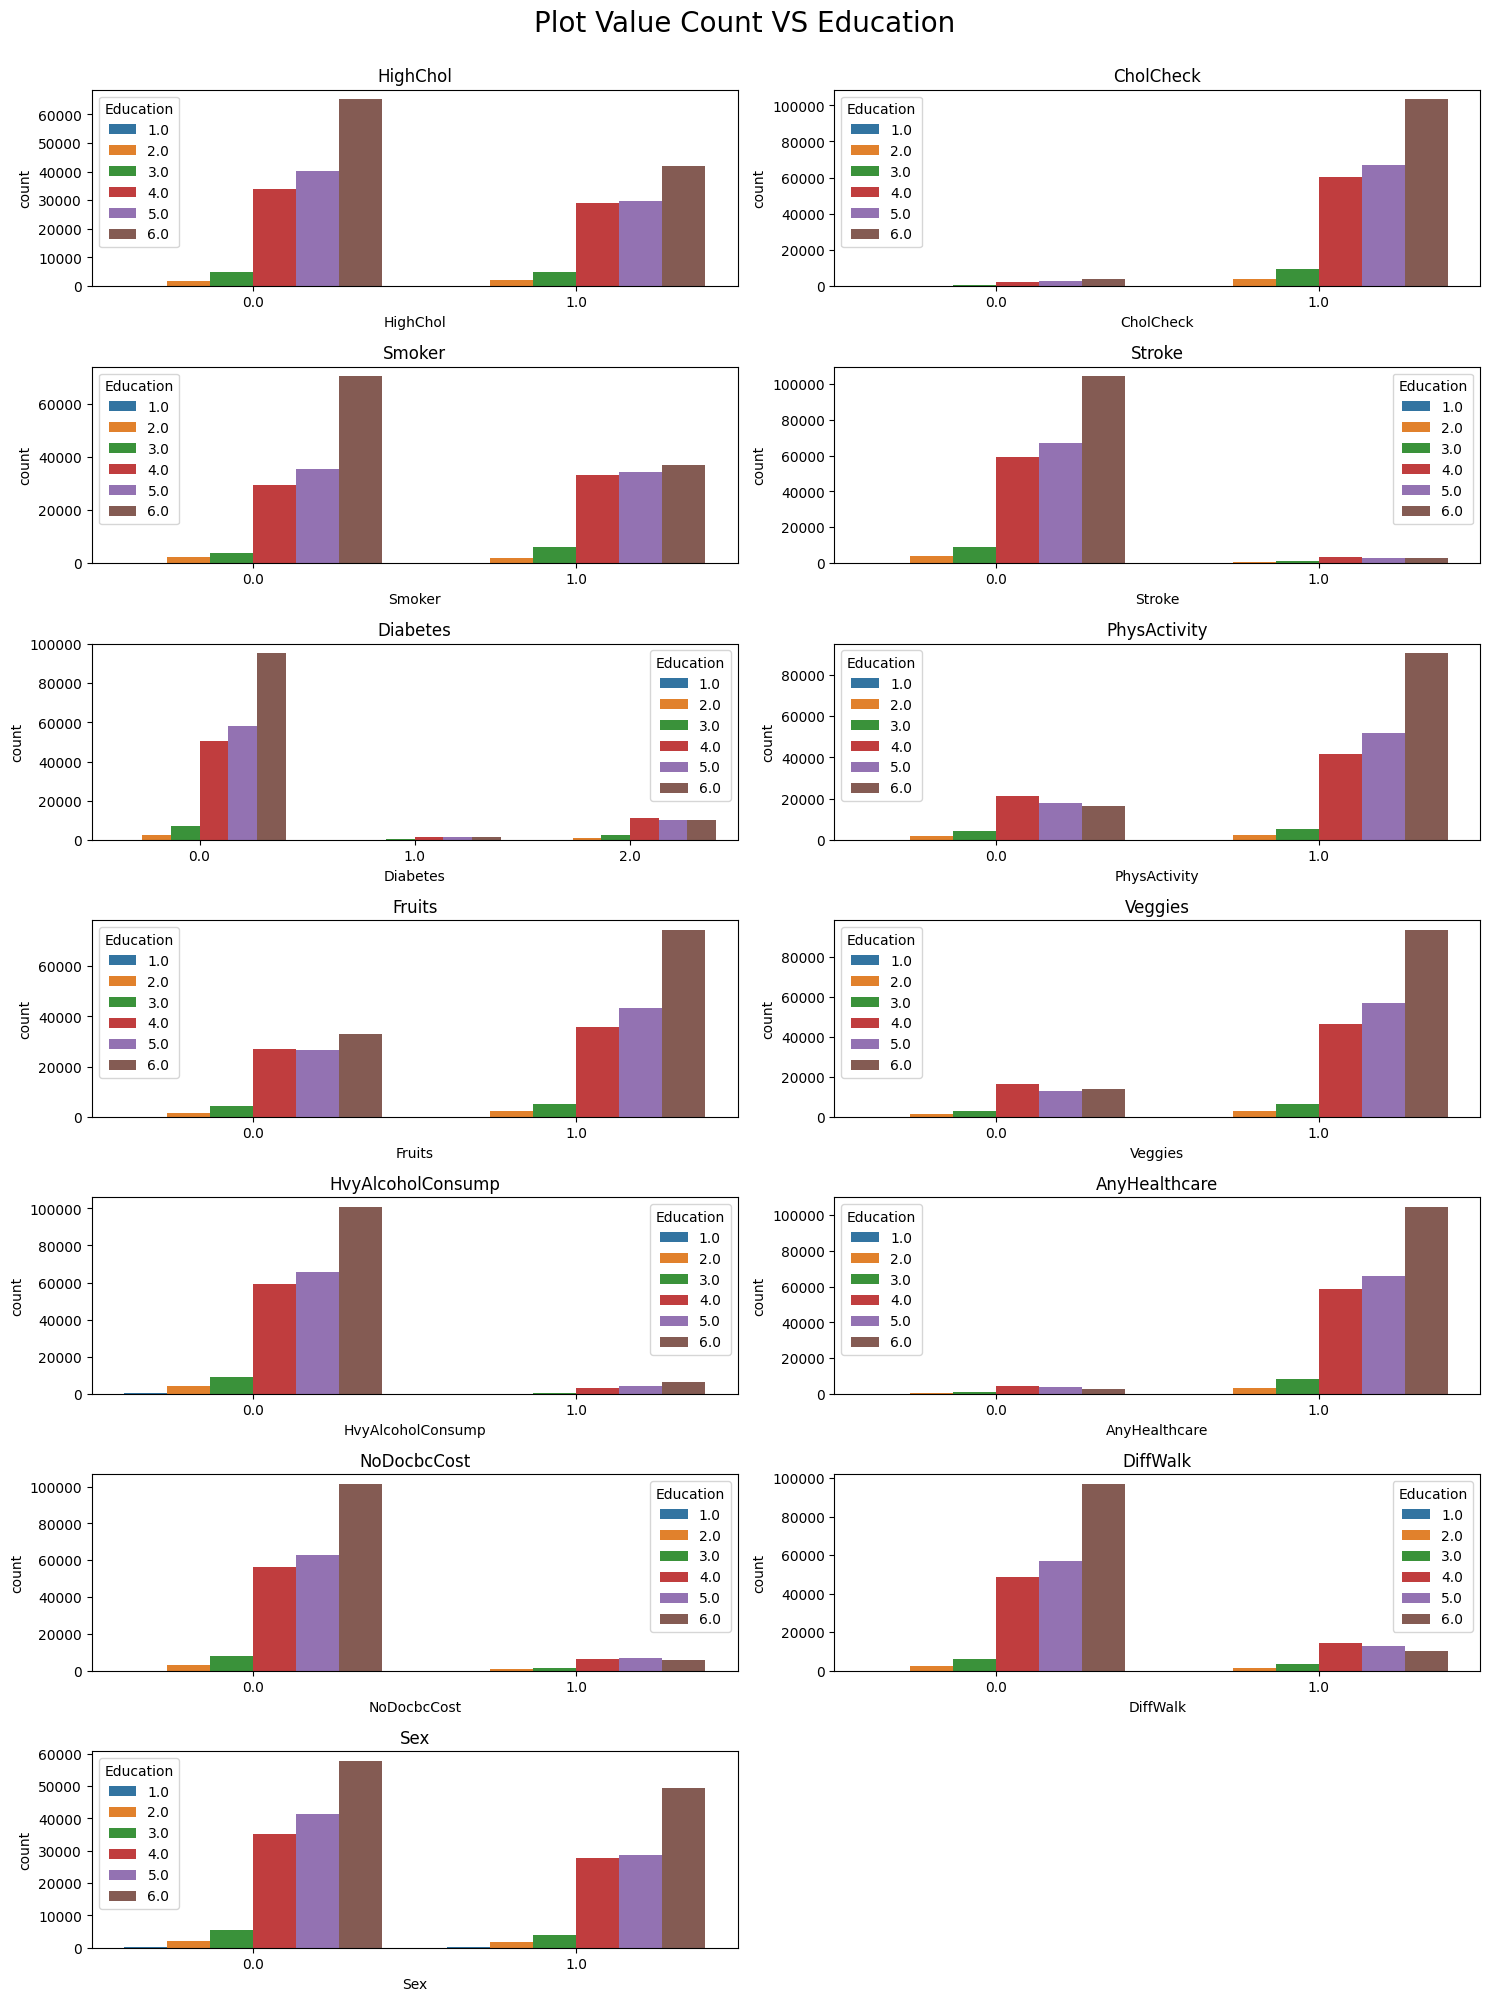

In [ ]:
plt.figure(figsize=(15,50))
for i,column in enumerate(bincol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS Education", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='Education')
    plt.title(f"{column}")
    plt.tight_layout()

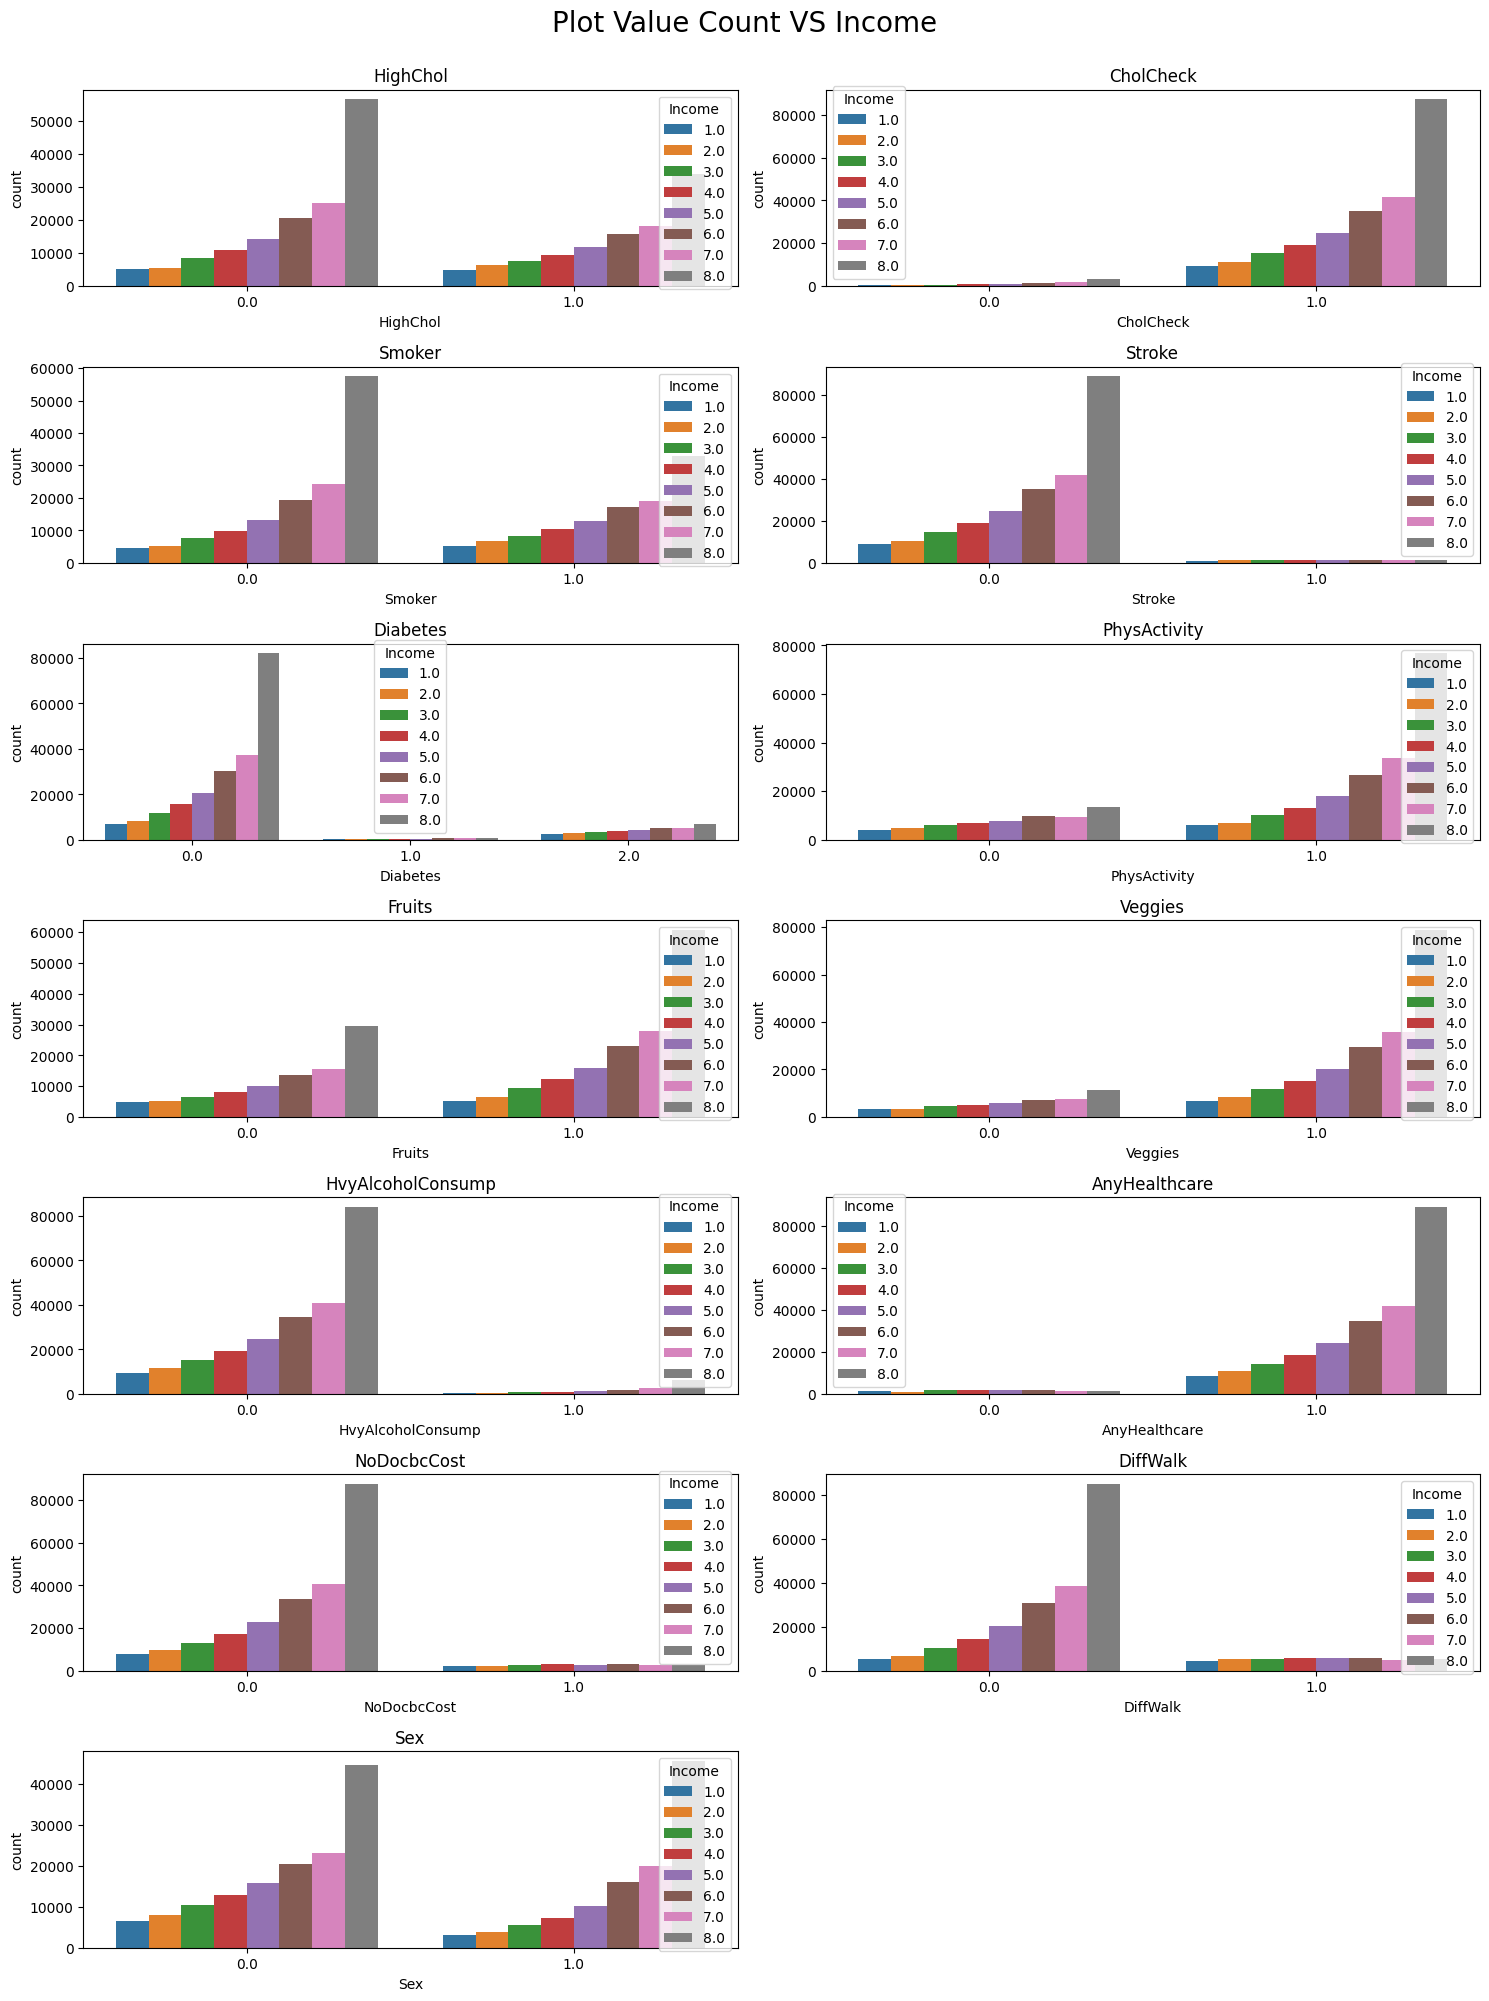

In [ ]:
plt.figure(figsize=(15,50))
for i,column in enumerate(bincol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS Income", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='Income')
    plt.title(f"{column}")
    plt.tight_layout()

<h1 style='background:#CCE2CB; border:0; color:black'><center> Feature Engineering </center></h1>

In [ ]:
# MinMaxScaler
for feature in ['BMI', 'MentHlth', 'PhysHlth']:
    df[feature] = df[feature].astype('int64')
    df[feature] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[[feature]])

<h1 style='background:#CCE2CB; border:0; color:black'><center> Preprocessing </center></h1>

In [ ]:
# Split column to Feature(X) and Target(Y)
X = df.drop(columns='HeartDiseaseorAttack')
Y = df['HeartDiseaseorAttack']

In [ ]:
# Split data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=48)

<h1 style='background:#CCE2CB; border:0; color:black'><center> Preprocessing </center></h1>

In [ ]:
# I will try some classifier algorithm and not tune the parameter, let it default
algorithm = [
#     LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),


]

In [ ]:
# Data without resample
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for cla in algorithm:
    cla.fit(X_train, Y_train)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')

    train_predictions = cla.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = cla.predict(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")

    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)

print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 90.0485%
Log Loss: 3.5868891115115993




<ipython-input-86-41163a998902>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


RandomForestClassifier
****Results****
Accuracy: 89.8593%
Log Loss: 3.65508902331693




<ipython-input-86-41163a998902>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


XGBClassifier
****Results****
Accuracy: 90.5708%
Log Loss: 3.3986289382989683




<ipython-input-86-41163a998902>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


AdaBoostClassifier
****Results****
Accuracy: 90.5807%
Log Loss: 3.395076859559108




<ipython-input-86-41163a998902>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


DecisionTreeClassifier
****Results****
Accuracy: 82.0088%
Log Loss: 6.484674947490173




<ipython-input-86-41163a998902>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


GradientBoostingClassifier
****Results****
Accuracy: 90.5807%
Log Loss: 3.395076859559108




<ipython-input-86-41163a998902>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


In [ ]:
X = df.drop(columns=['Education'])
y = df['Education']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
predictions = clf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.40


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators (trees) as needed

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions = rf_clf.predict(X_test)



In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.47
